**Method 1: Detecting Outliers Using Boxplot**

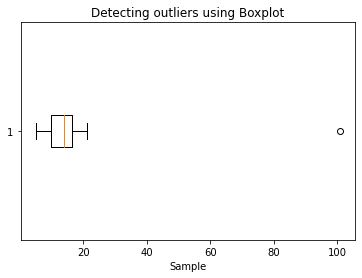

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

**Method 2: Detecting Outliers using Inter Quartile Range**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


**Method 3: Detecting outliers using Z-Score**

In [3]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


**Treatment of outliers**

**Treatment 1: Trimming/Remove the outliers**

In [5]:
#Trimming for i in sample_outliers:
sample= np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])
i=[101]     
a = np.delete(sample, np.where(sample==i)) 
print(a) 
print(len(sample), len(a))

[15 18  7 13 16 11 21  5 15 10  9]
12 11


**Treatment 2: Quantile Based Flooring and Capping**

In [6]:
#Computing 10th, 90th percentiles and replacing the outliers 
tenth_percentile = np.percentile(sample, 10) 
ninetieth_percentile = np.percentile(sample, 90) 
# print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample) 
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b) 
# print("Sample:", sample) 
print("New array:",b)

New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


**Treatment 3: Mean/Median Imputation**

In [7]:
median = np.median(sample)# Replace with median for i in sample_outliers:
c = np.where(sample==i, 14, sample) 
print("Sample: ", sample)
print("New array: ",c) # print(x.dtype)

Sample:  [ 15 101  18   7  13  16  11  21   5  15  10   9]
New array:  [15 14 18  7 13 16 11 21  5 15 10  9]


Text(0.5, 0, 'Sample')

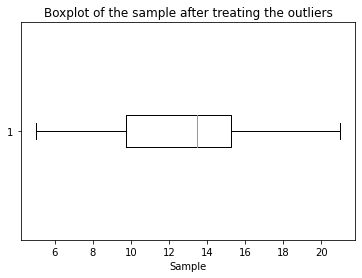

In [8]:
#Visualizing the Data after applying the treatment of Outlier
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")